In [1]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn

In [1]:
# Data processing
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Dataset
from sklearn import datasets
# Dimensionality reduction
from sklearn.decomposition import PCA
# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

dataset = pd.read_csv("data/tracks_with_genres_&_language.csv")
df = pd.DataFrame(dataset)
df.info()
df_features = df[['energy', 'valence', 'acousticness']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186011 entries, 0 to 186010
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                186011 non-null  object 
 1   name              186011 non-null  object 
 2   popularity        186011 non-null  int64  
 3   duration_ms       186011 non-null  int64  
 4   explicit          186011 non-null  int64  
 5   id_artists        186011 non-null  object 
 6   release_date      186011 non-null  object 
 7   danceability      186011 non-null  float64
 8   energy            186011 non-null  float64
 9   key               186011 non-null  int64  
 10  loudness          186011 non-null  float64
 11  mode              186011 non-null  int64  
 12  speechiness       186011 non-null  float64
 13  acousticness      186011 non-null  float64
 14  instrumentalness  186011 non-null  float64
 15  liveness          186011 non-null  float64
 16  valence           18

In [3]:
df['acousticness'].value_counts()

acousticness
0.102000    312
0.111000    297
0.110000    295
0.112000    295
0.103000    294
           ... 
0.000064      1
0.000007      1
0.000002      1
0.000004      1
0.000005      1
Name: count, Length: 4975, dtype: int64

In [4]:
df['valence'].value_counts()

valence
0.96100    678
0.96200    568
0.96300    513
0.96400    455
0.96000    445
          ... 
0.00237      1
0.00867      1
0.01660      1
0.00850      1
0.04090      1
Name: count, Length: 1758, dtype: int64

In [5]:
df['energy'].value_counts()

energy
0.803000    372
0.726000    371
0.725000    369
0.720000    367
0.855000    366
           ... 
0.000261      1
0.026300      1
0.003380      1
0.014700      1
0.006210      1
Name: count, Length: 2031, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split

# Assuming df_features contains your features
X = df_features

# Splitting the data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# K Means Clustering

In [3]:
# Kmeans model
kmeans = KMeans(n_clusters = 3, random_state = 300, n_init = 20, tol = 0.0001)
# Fit and predict on the data
y_kmeans = kmeans.fit_predict(df_features)
#Save centroids
centroids = kmeans.cluster_centers_
# Save the predictions as a column
df['y_kmeans']=y_kmeans
# Check the distribution
df['y_kmeans'].value_counts()

y_kmeans
0    75304
2    62602
1    48105
Name: count, dtype: int64

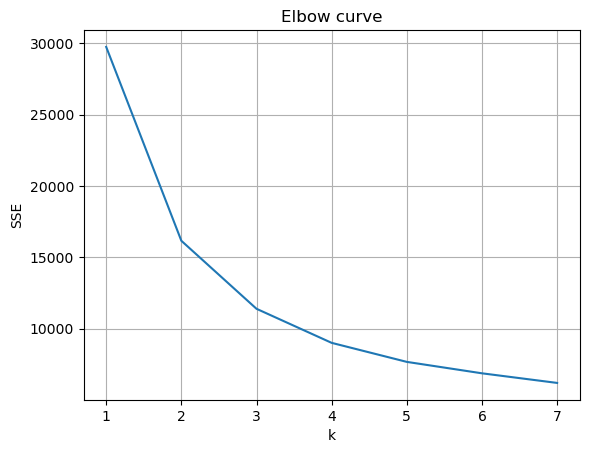

In [4]:
SSE = []
for i in range(1,8):
    model_i = KMeans(n_clusters = i, max_iter=300, tol=0.0001, n_init=20, random_state=999)
    model_i.fit(X_train)
    SSE.append(model_i.inertia_)

# Plot the elbow curve
k = (range(1,8))
plt.plot(k, SSE)

# Add more information to plot.
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [6]:
model = KMeans(n_clusters = 3, max_iter=300, tol=0.0001, n_init=20, random_state=999)
model.fit(X)
model.cluster_centers_

array([[0.76116259, 0.77193847, 0.19744622],
       [0.39626995, 0.39050749, 0.71588415],
       [0.71100162, 0.35633501, 0.1075715 ]])

## visualising clusters

#### using heatmap

<Axes: >

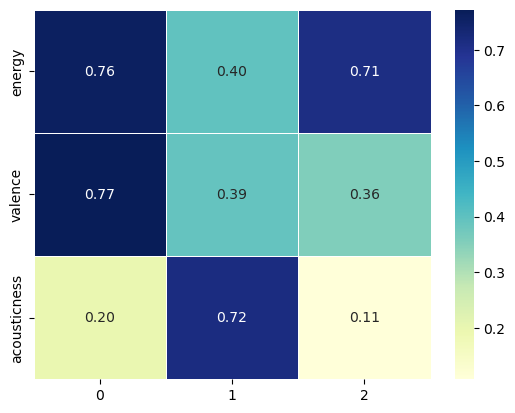

In [8]:
clust_means_df = pd.DataFrame(model.cluster_centers_, columns=['energy', 'valence', 'acousticness'])
sns.heatmap(clust_means_df.T, linewidths=.5, cmap="YlGnBu", annot=True, fmt=".2f")

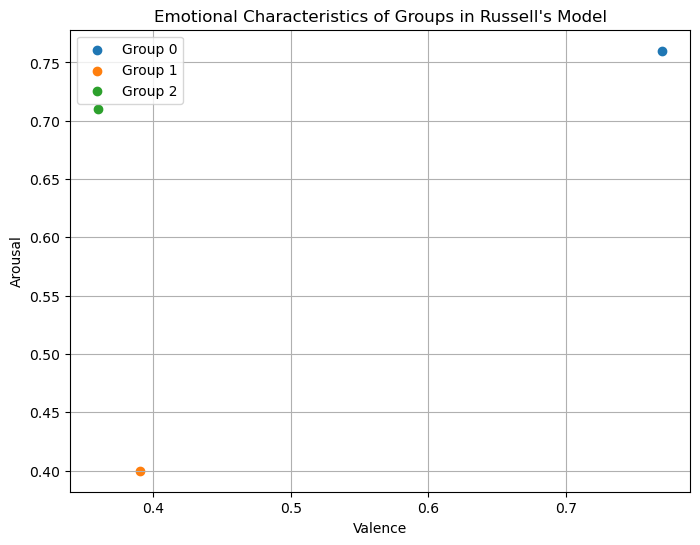

In [1]:
import matplotlib.pyplot as plt

# Define the characteristics of each group
groups = {
    'Group 0': {'valence': 0.77, 'arousal': 0.76},
    'Group 1': {'valence': 0.39, 'arousal': 0.40},
    'Group 2': {'valence': 0.36, 'arousal': 0.71},
}

# Create a scatter plot
plt.figure(figsize=(8, 6))
for group, data in groups.items():
    plt.scatter(data['valence'], data['arousal'], label=group)

# Add labels and title
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.title('Emotional Characteristics of Groups in Russell\'s Model')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Insights:
- Cluster 0: High Energy, High Valence, Low Acousticness.
- Cluster 1: Medium Energy, Medium Valence, Higher Acousticness.
- Cluster 2: Higher Energy, Lower Valence, Very Low Acousticness.

# Exporting

In [ ]:
df.to_csv('data/tracks_with_genres_lang_emotion.csv', index=False)